Spotify Dataset Analysis

Data Overview:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_clean.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


Univariate Analysis:

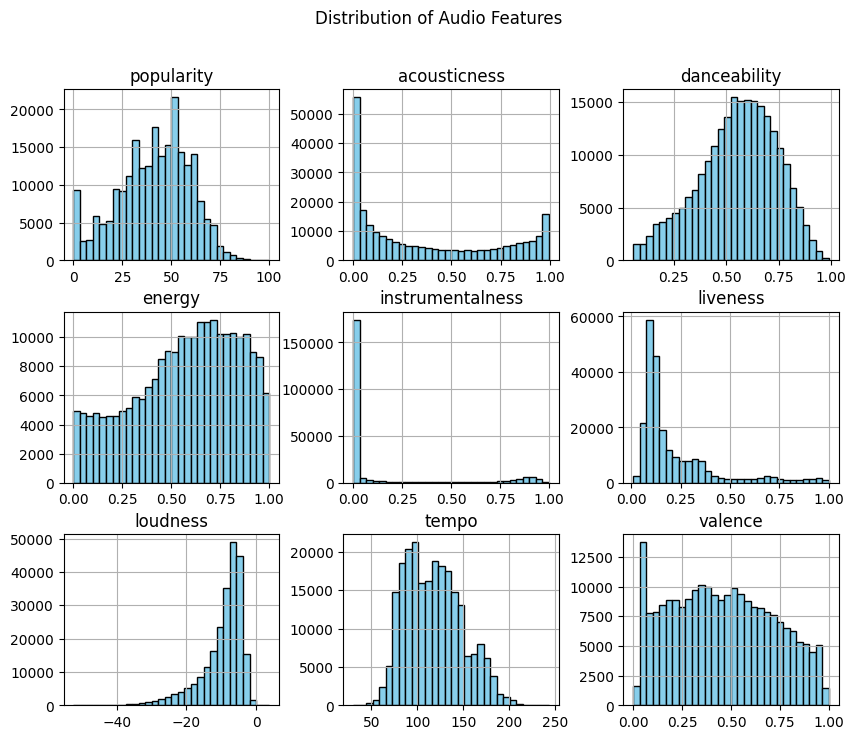

In [3]:
num_cols = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence']
df[num_cols].hist(figsize=(10, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Audio Features")
plt.show()

Most songs have a high amount of danceability, energy, tempo, and loudness. Suggesting songs with a high popularity most have a strong balance between these values.

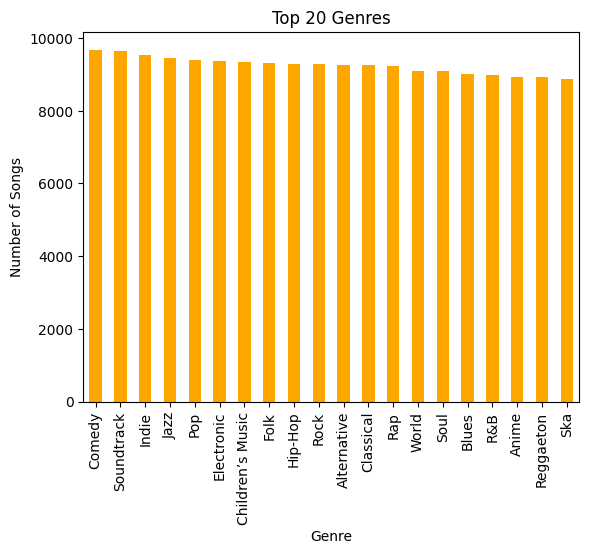

In [4]:
df['genre'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title("Top 20 Genres")
plt.ylabel("Number of Songs")
plt.xlabel("Genre")
plt.show()

Bivariate Analysis:

Comedy and Soundtrack music are the most popular genres 

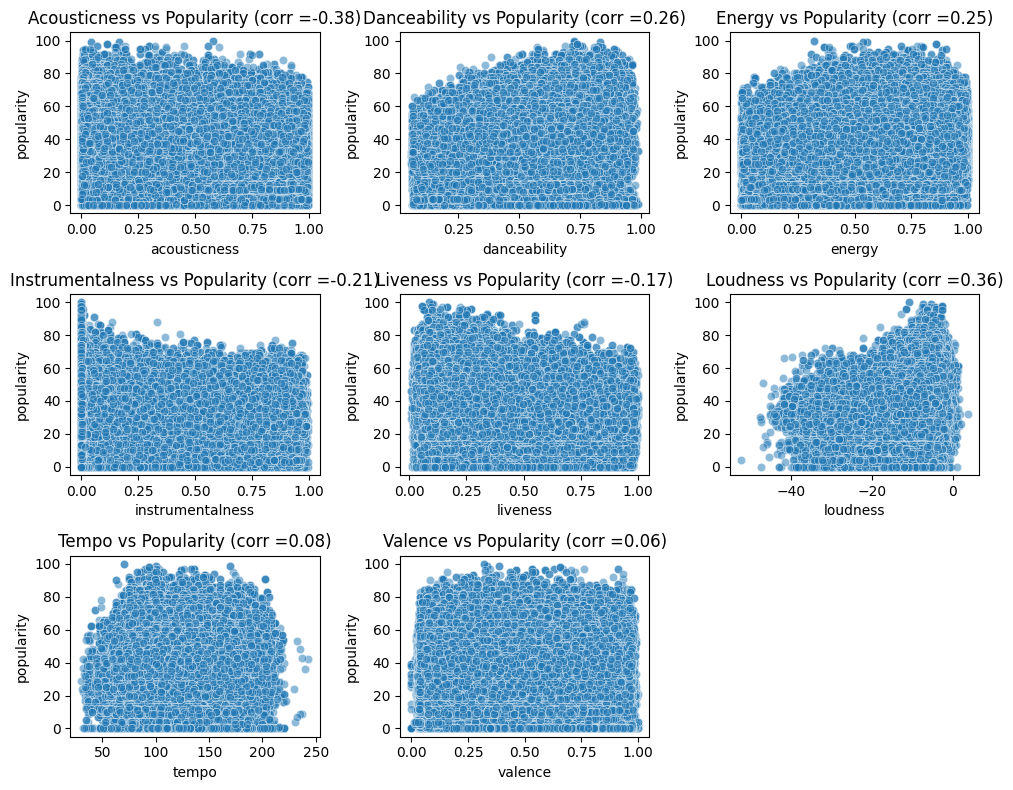

In [5]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['popularity'], alpha=0.5)
    corr = np.corrcoef(df[feature], df['popularity'])[0,1]
    plt.title(f'{feature.capitalize()} vs Popularity (corr ={corr:.2f})')
plt.tight_layout()
plt.show()

Songs that become popular are more likely to be songs that have a higher danceability, energy and loudness. Songs with higher acoustics, instrumentalness and liveness tend not to be as popular.

Correlation Analysis:

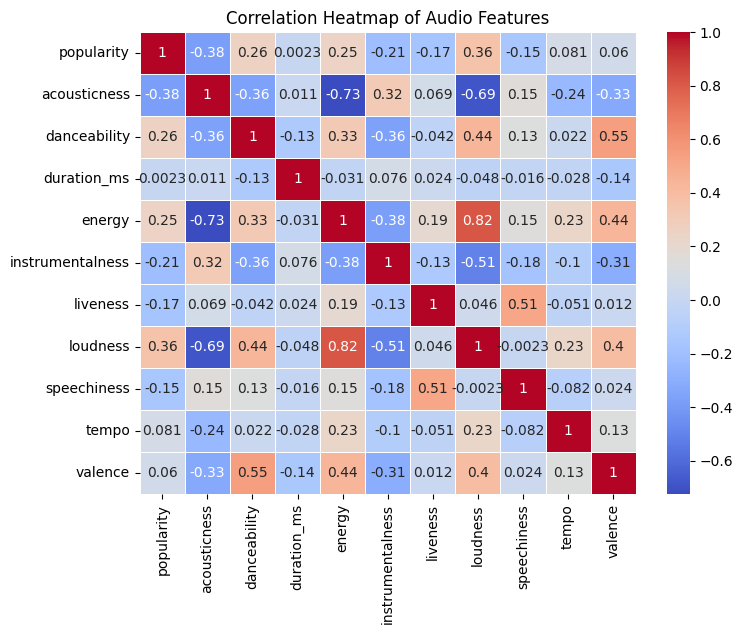

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

The features with the strongest correlations are:
- loudness and energy (0.82) - suggesting songs with high energy are usuaually louder than average
- danceability and valence (0.55) - suggesting songs that have are happier and more positive are more danceable
- speechiness and liveness (0.51) - suggesting songs with more spoken words in them have a higher reverbartion time and resonance
- energy and valence (0.44) - suggesting songs that are more positive are normally higher energy
- loudness and valence (0.4) - suggesting songs that are louder tend to be more positive
- loudness and popularity (0.36) - suggesting songs that are louder than normal tend to be more popular than others
- danceability and energy (0.33) - suggesting songs that have more energy are more likely to be danceable
- acousticness and instrumentalness (0.32) - suggesting songs that have more acoustics also contain more instrumentals on average

Key Insights:
- Popular songs generally have higher danceability, energy, loudness, and valence
- Most songs tend to have low acousticness and liveness
- Despite listeners having a bias for songs with higher valence, the dataset contains songs that have a lower valence, suggesting they are more neutral/sad 
- Songs with higher accousticness and liveness are generally less popular amongst mainstream listeners
- Most songs have a moderate to high danceability, tempo and energy, suggesting bias towards more upbeat songs

Overall, the analysis reveals that mainstream listeners tend to favour more upbeat, energetic tracks with strong rhythmic qualities and positive emotional tones, while softer acoustic or instrumental songs occupy a smaller niche in the popularity